In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
def plot_loss(losses, epoch_marker_pos=None, plot_title="Loss", window_size=20, plot_avg = False, plot_file=None):
    if plot_file is None:
        plot_file = f'./data/losses/loss.png'
    if epoch_marker_pos is None:
        epoch_marker_pos = []

    plt.figure(figsize=(10, 6))
    plt.plot(losses, label=f'Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    # Compute the moving average
    if plot_avg:
        if window_size > 1 and len(losses) >= window_size:
            losses_padded = np.pad(losses, (window_size // 2, window_size // 2 - 1), mode='edge')
            moving_avg = np.convolve(losses_padded, np.ones(window_size) / window_size, mode='valid')
            moving_avg_x = np.arange(0, len(losses))
            print(moving_avg_x.shape, moving_avg.shape)
            plt.plot(moving_avg_x, moving_avg, label=f'Moving Average (window={window_size})', color='orange')

    for ix, x_pos in enumerate(epoch_marker_pos):
        plt.axvline(x=x_pos, color='red', linestyle='dotted', linewidth=1)
        plt.text(
            x_pos,
            max(losses),
            f'Epoch {ix}',
            rotation=90,
            verticalalignment='top',
            horizontalalignment='right',
            fontsize=10,
            color='red'
        )

    plt.title(plot_title)
    plt.legend()
    plt.grid(True)
    plt.show()
    #plt.savefig(plot_file)
    #plt.close()

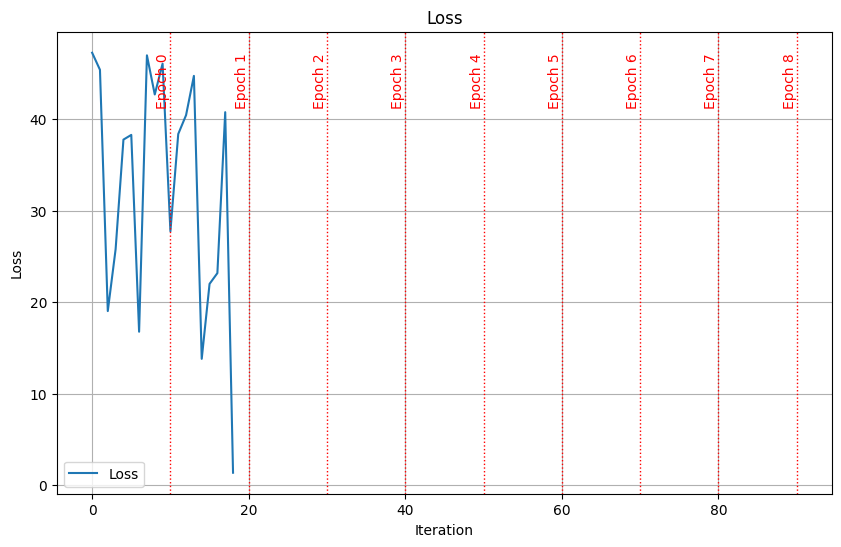

In [46]:

losses = np.arange(19, 0, -1)
rand_var = np.random.rand(19)
losses = losses + 40 * rand_var
plot_loss(losses, epoch_marker_pos=[10, 20, 30, 40, 50, 60, 70, 80, 90], plot_title="Loss", window_size=20, plot_avg = True, plot_file=None)